In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
from data_reader_writer import data_writer
import loads

import pypsa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Consumer Transformation - 2045

In [4]:
# scenario = 'Leading The Way'
scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2045
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2045 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2045 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2045 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland_2045.index, generators_p_nom_scotland_2045.values / 1000)
plt.xticks(generators_p_nom_scotland_2045.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

KeyboardInterrupt: 

## Consumer Transformation - 2040

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Tidal stream              53.400000
Waste                     64.496000
Wave power               113.000000
Small Hydro              251.359823
Natural Gas              365.800000
CCS Gas                  910.000000
Large Hydro             1841.494897
Biomass (dedicated)     3781.579389
Solar Photovoltaics     4138.502758
Wind Onshore           26094.299038
Wind Offshore          36001.090000
Name: p_nom, dtype: float64
carrier
Liquid Air                       690.924138
Compressed Air                   966.427586
Pumped Storage Hydroelectric    2696.000000
Battery                         3050.132935
Name: p_nom, dtype: float64


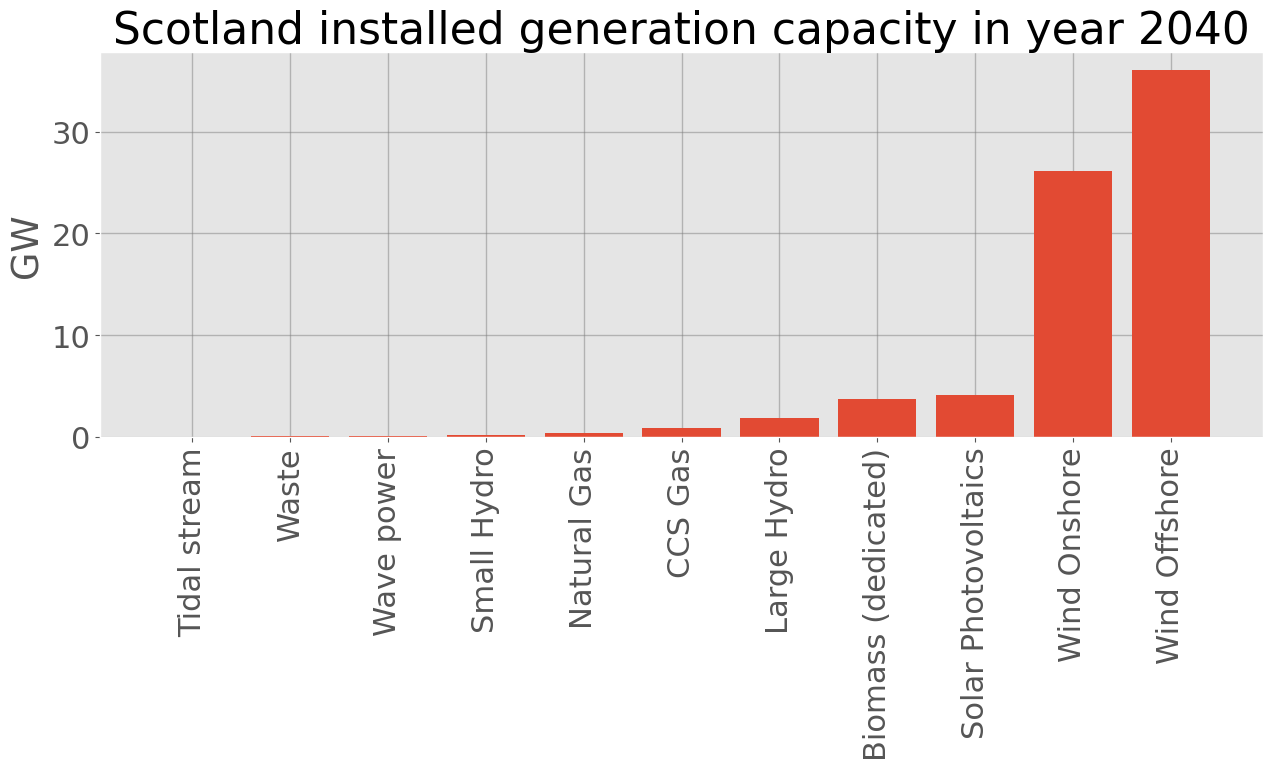

In [ ]:
# scenario = 'Leading The Way'
scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2040
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2040 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2040 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2040 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Consumer Transformation - 2035

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Tidal stream              53.400000
Waste                     70.528000
Wave power                88.000000
Small Hydro              242.779463
CCS Gas                  958.584747
Biomass (dedicated)     1413.996592
Large Hydro             1778.634085
Solar Photovoltaics     3098.941140
Wind Onshore           23603.083025
Wind Offshore          30951.090000
Name: p_nom, dtype: float64
carrier
Compressed Air                   552.634483
Liquid Air                       552.993103
Pumped Storage Hydroelectric    2696.000000
Battery                         2766.232650
Name: p_nom, dtype: float64


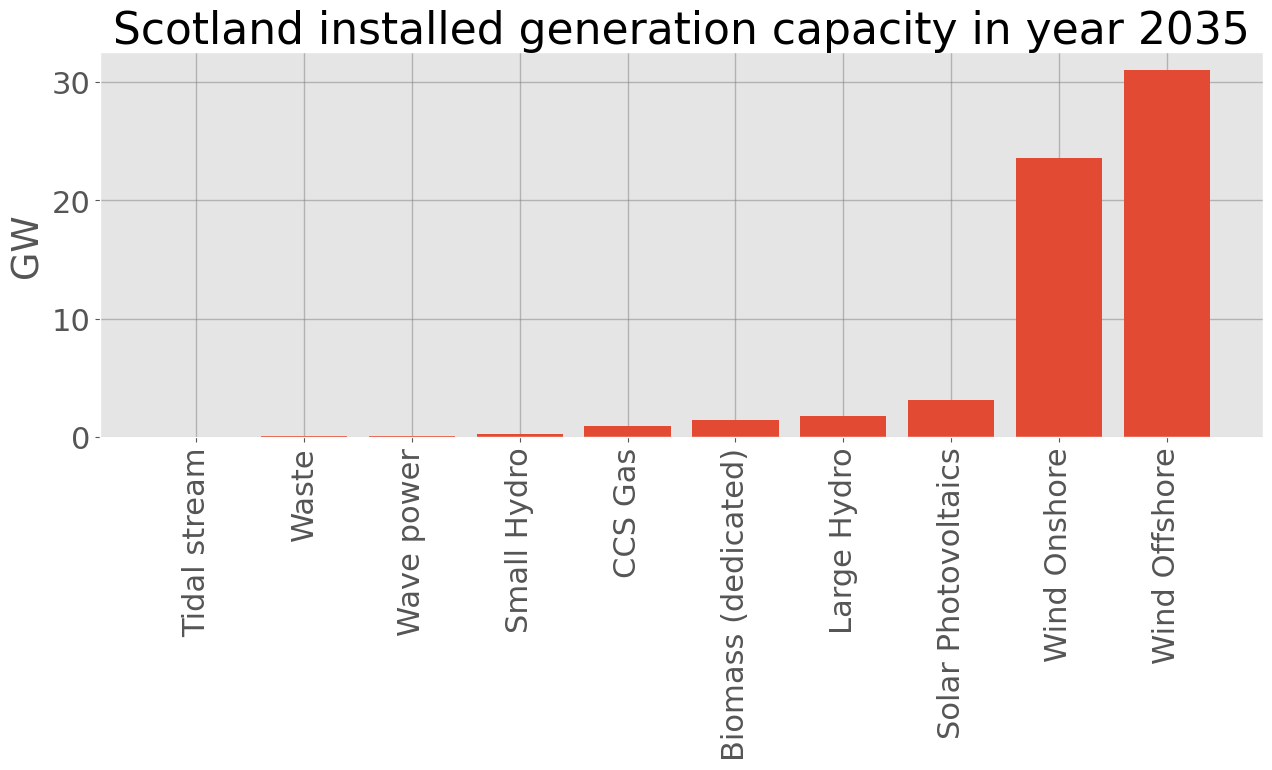

In [ ]:
# scenario = 'Leading The Way'
scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2035
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass', 'Natural Gas'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2035 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2035 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2035 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Consumer Transformation - 2030

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Oil                       55.200000
Waste                     77.488000
Wave power                88.000000
Small Hydro              233.366972
Biomass (dedicated)      237.521592
CCS Gas                  968.584707
Large Hydro             1709.676910
Solar Photovoltaics     1880.145003
Wind Offshore           7686.090000
Wind Onshore           21192.497473
Name: p_nom, dtype: float64
carrier
Compressed Air                     0.910345
Liquid Air                       235.779310
Pumped Storage Hydroelectric     950.000000
Battery                         2371.443451
Name: p_nom, dtype: float64


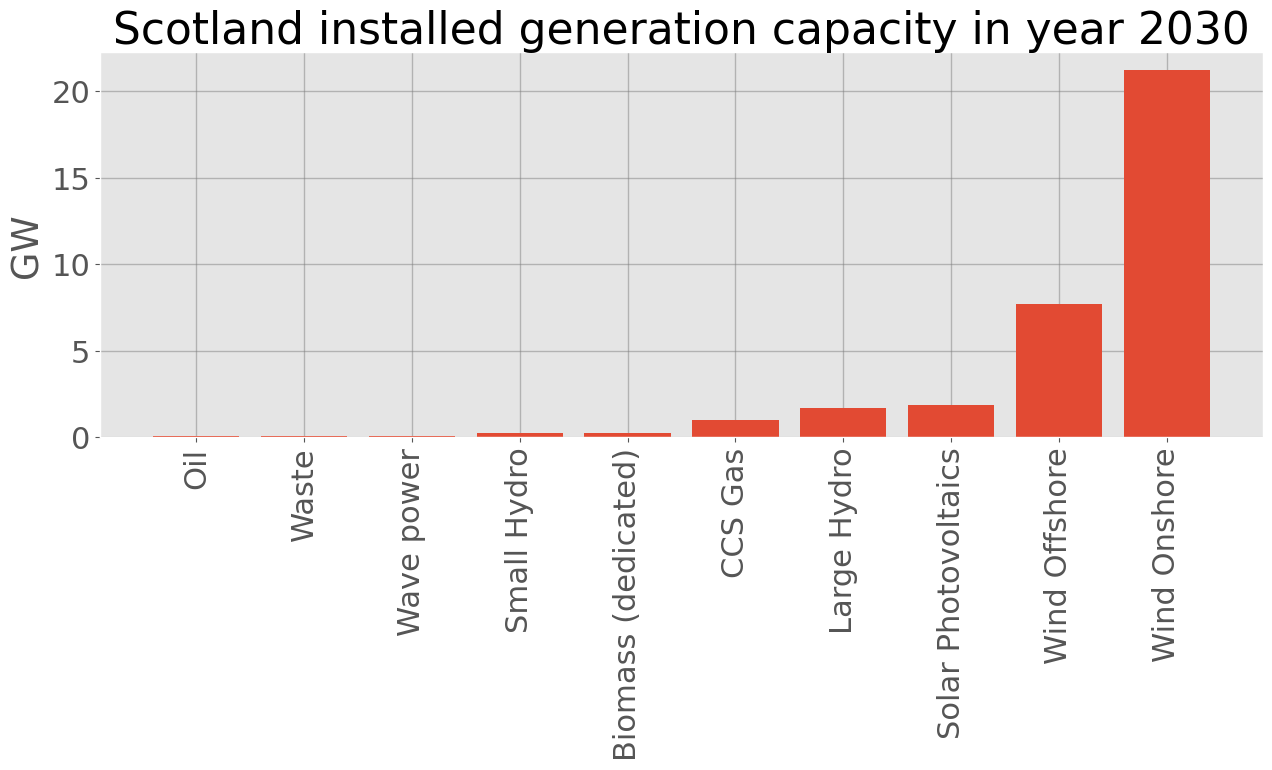

In [ ]:
# scenario = 'Leading The Way'
scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2030
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass', 'Natural Gas'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2030 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2030 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2030 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Consumer Transformation - 2025

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


carrier
Waste                     69.136000
Oil                      178.020000
Small Hydro              223.657589
Biomass (dedicated)      257.172066
Nuclear                  625.000000
Solar Photovoltaics     1040.870513
Natural Gas             1073.800000
Large Hydro             1638.544707
Wind Offshore           5066.100000
Wind Onshore           12836.276195
Name: p_nom, dtype: float64
carrier
Compressed Air                     0.910345
Liquid Air                        15.144828
Pumped Storage Hydroelectric     740.000000
Battery                         1354.043383
Name: p_nom, dtype: float64
4777.744 peak load in Scotland


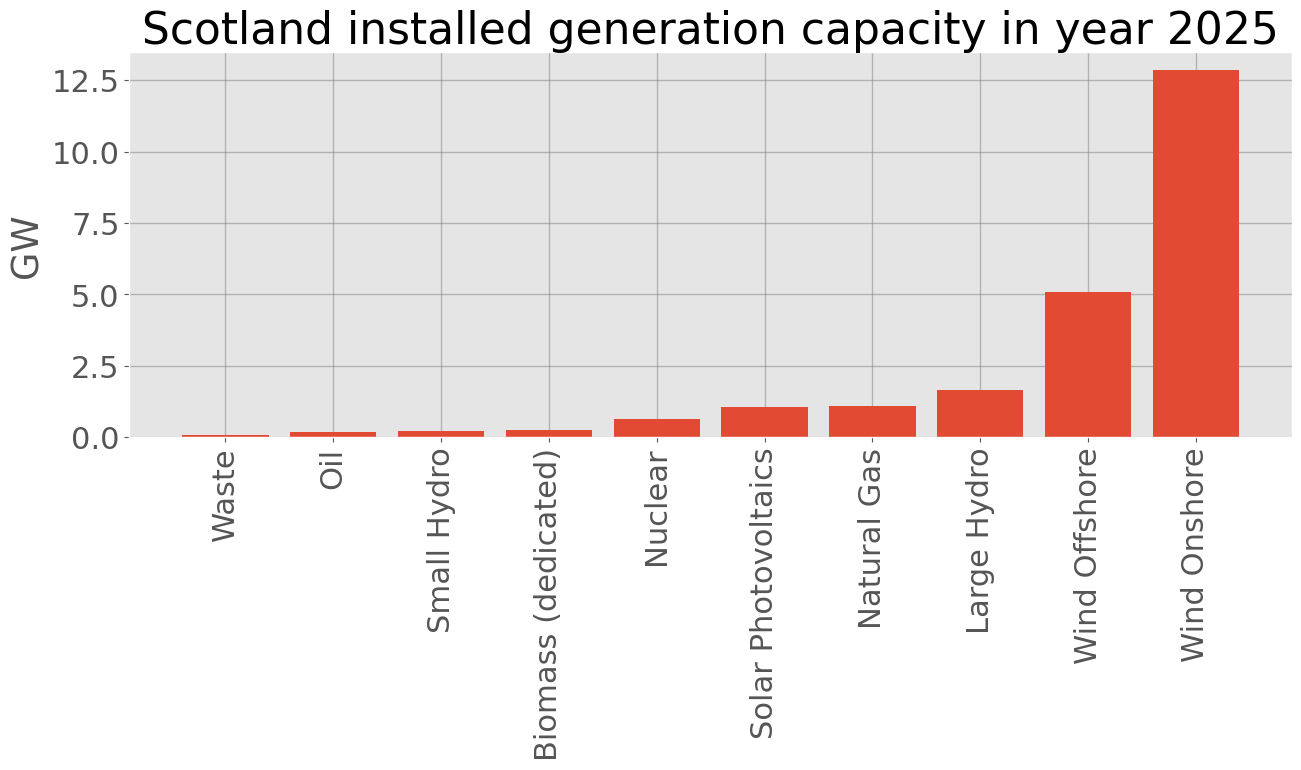

In [5]:
# scenario = 'Leading The Way'
scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2025
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2025 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2025 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2025 = df_loads[buses_scotland].sum(axis=1).max()
print(peak_load_scotland_2025, 'peak load in Scotland')

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Consumer Transformation - 2021

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


carrier
Waste                    57.536000
Oil                     197.340000
Biomass (dedicated)     207.699122
Small Hydro             217.124238
Solar Photovoltaics     462.292021
Natural Gas            1038.400000
Large Hydro            1590.680533
Wind Offshore          1663.100000
Nuclear                1750.000000
Wind Onshore           8929.673005
Name: p_nom, dtype: float64
carrier
Compressed Air                    0.910345
Liquid Air                        1.379310
Battery                         124.353150
Pumped Storage Hydroelectric    740.000000
Name: p_nom, dtype: float64
4619.7


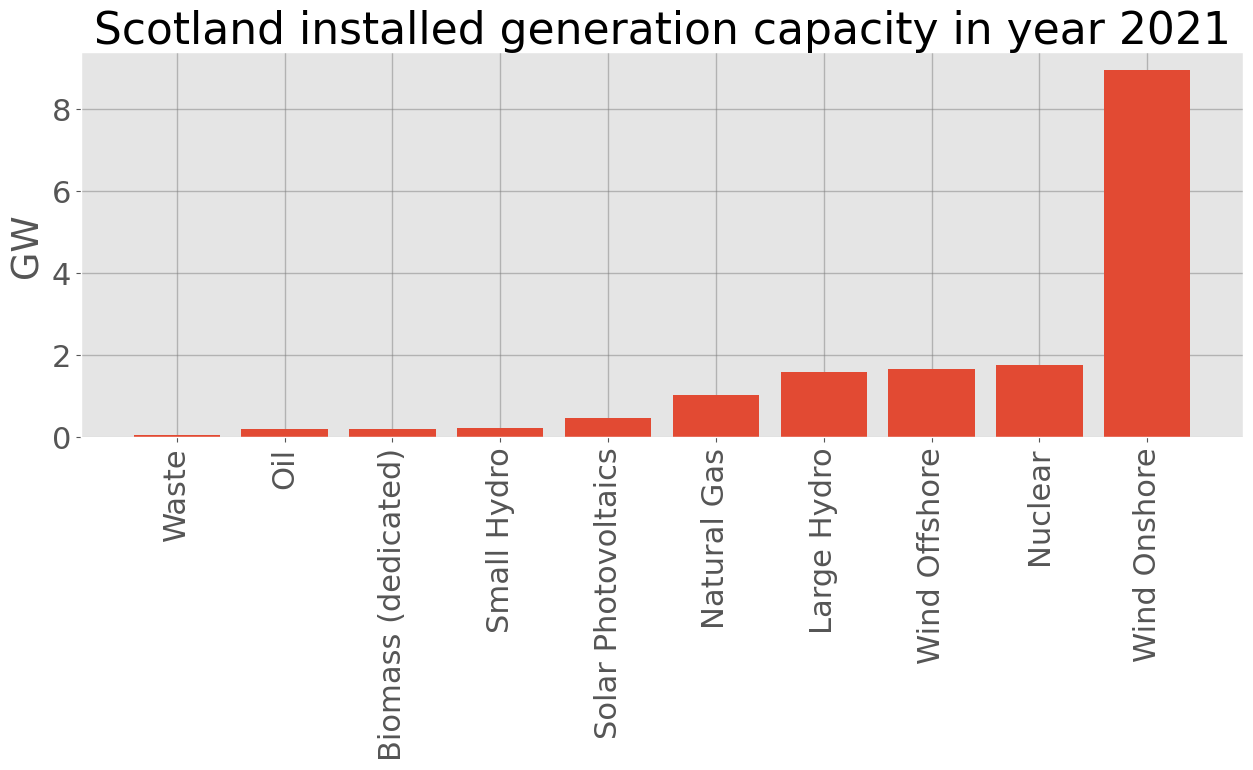

In [ ]:
# scenario = 'Leading The Way'
scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2021
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2021 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2021 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2021 = df_loads[buses_scotland].sum(axis=1).max()
print(peak_load_scotland_2021)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

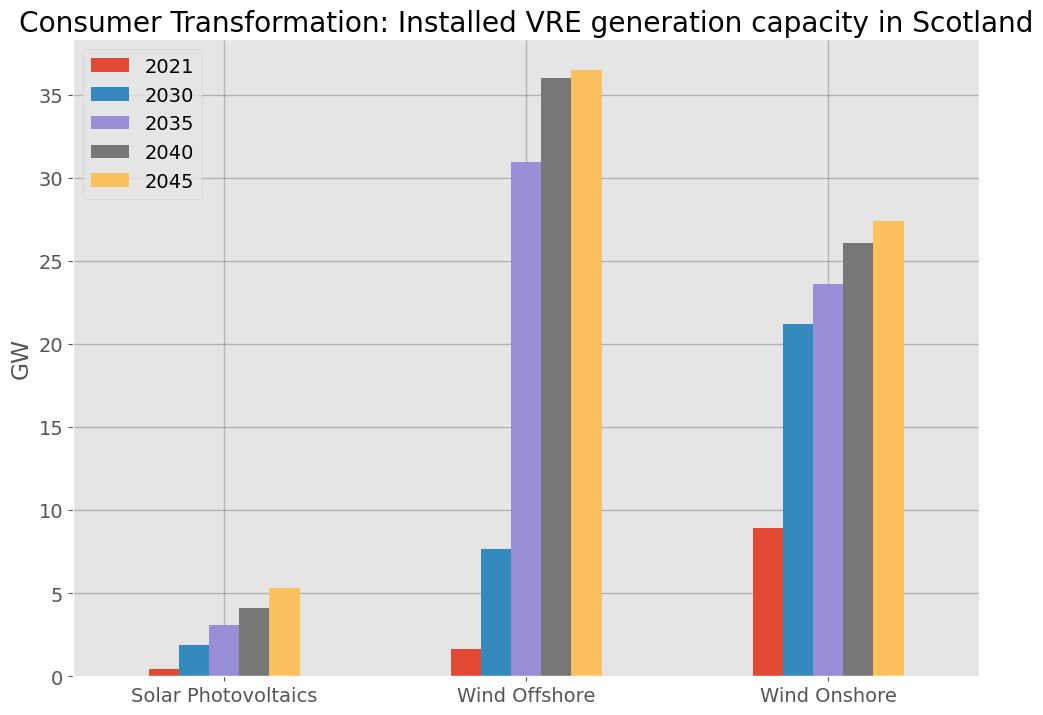

In [ ]:
df = pd.concat([generators_p_nom_scotland_2021, generators_p_nom_scotland_2030, generators_p_nom_scotland_2035, generators_p_nom_scotland_2040, generators_p_nom_scotland_2045], axis=1) / 1000
df.loc['Large Hydro'] += df.loc['Small Hydro']
df.drop(['Small Hydro'], inplace=True)

df.columns = [2021, 2030, 2035, 2040, 2045]
df = df.reset_index().fillna(0)
df.iat[5, 0] = 'Hydro'

df_vres = df.iloc[[3, 6, 8]]
plt.rcParams.update({'font.size': 14})
df_vres.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Consumer Transformation: Installed VRE generation capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

                carrier      2021       2030       2035       2040       2045
0                 Waste  0.057536   0.077488   0.070528   0.064496   0.054288
1                   Oil  0.197340   0.055200   0.000000   0.000000   0.000000
2   Biomass (dedicated)  0.207699   0.237522   1.413997   3.781579   3.690714
3   Solar Photovoltaics  0.462292   1.880145   3.098941   4.138503   5.338569
4           Natural Gas  1.038400   0.000000   0.000000   0.365800   0.141600
5                 Hydro  1.807805   1.943044   2.021414   2.092855   2.152865
6         Wind Offshore  1.663100   7.686090  30.951090  36.001090  36.501090
7               Nuclear  1.750000   0.000000   0.000000   0.000000   0.000000
8          Wind Onshore  8.929673  21.192497  23.603083  26.094299  27.372444
9            Wave power  0.000000   0.088000   0.088000   0.113000   0.113000
10              CCS Gas  0.000000   0.968585   0.958585   0.910000   0.910000
11         Tidal stream  0.000000   0.000000   0.053400   0.0534

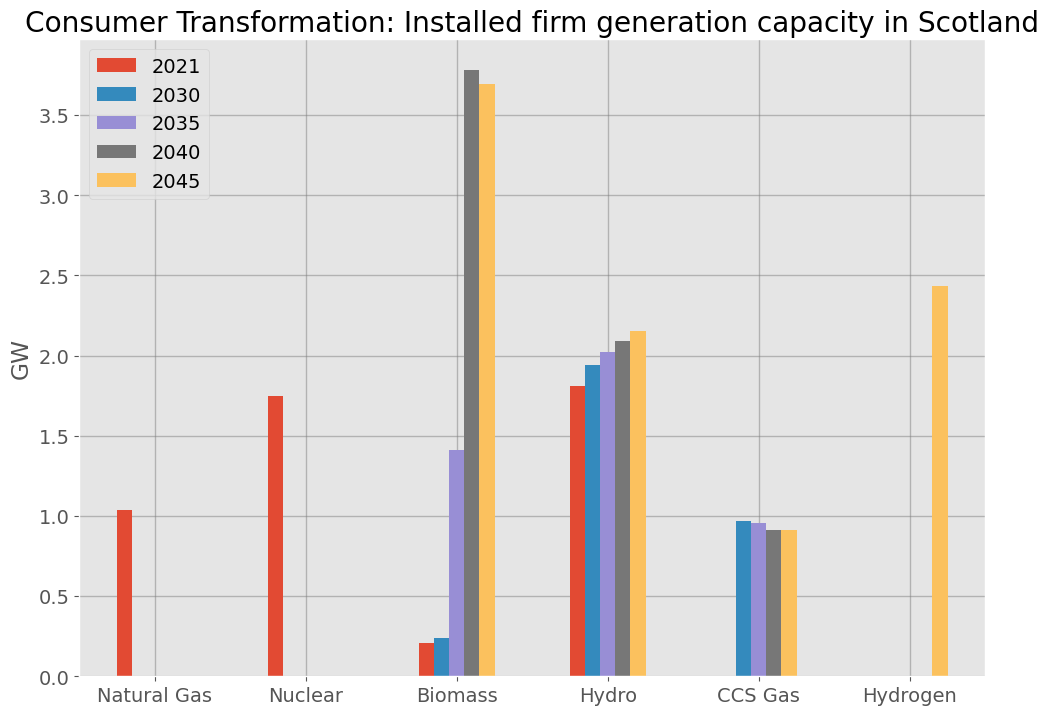

In [ ]:
print(df)
df_firm = df.iloc[[4, 7, 2, 5, 10, 12]]
df_firm.at[4, 2040] = 0.
df_firm.at[4, 2045] = 0.
df_firm.at[2, 'carrier'] = 'Biomass'
df_firm.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Consumer Transformation: Installed firm generation capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

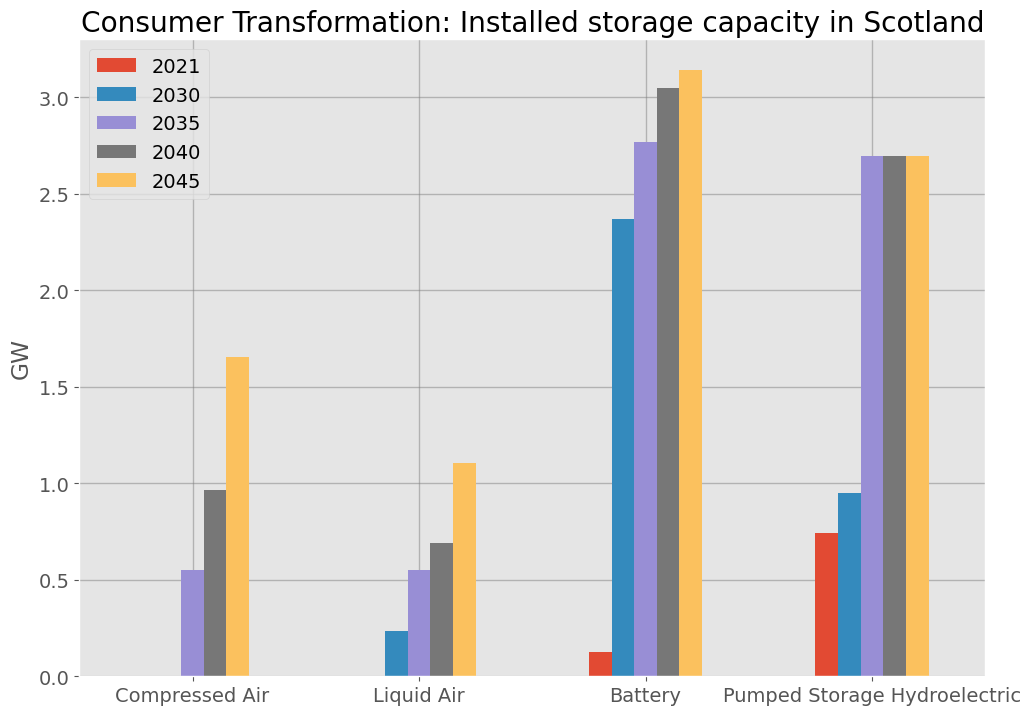

In [ ]:
df_s = pd.concat([storage_p_nom_scotland_2021, storage_p_nom_scotland_2030, storage_p_nom_scotland_2035, storage_p_nom_scotland_2040, storage_p_nom_scotland_2045], axis=1) / 1000
df_s.columns = [2021, 2030, 2035, 2040, 2045]
df_s = df_s.reset_index().fillna(0)
df_s.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Consumer Transformation: Installed storage capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

      Peak Demand
2021     4.619700
2030     5.917484
2035     7.961007
2040    10.156640
2045    11.296485


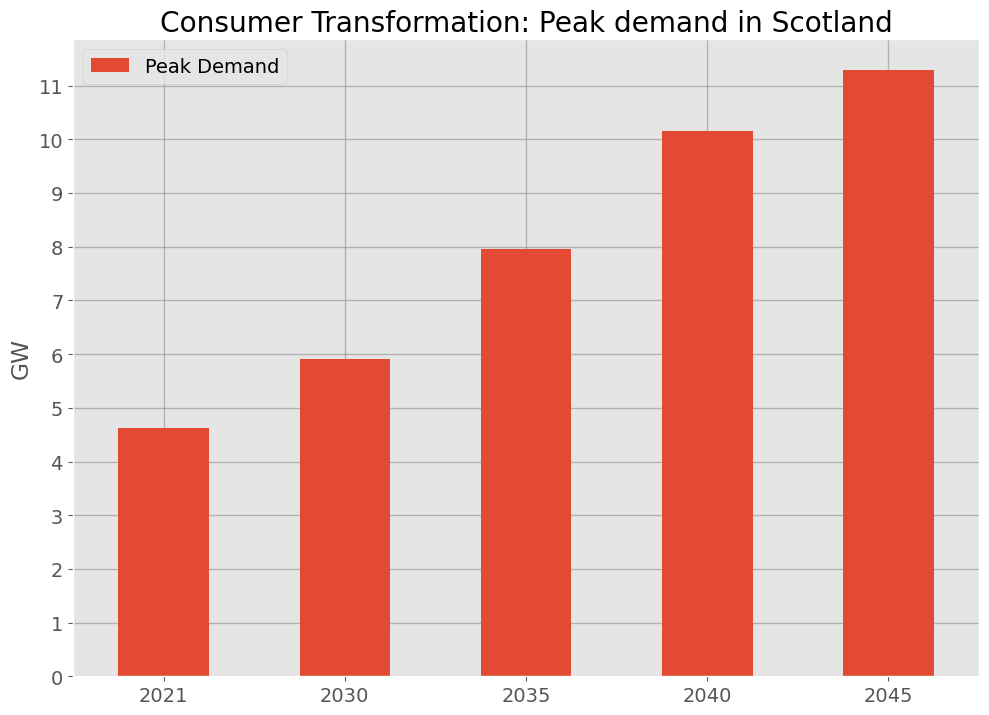

In [ ]:
df_l = pd.DataFrame([peak_load_scotland_2021, peak_load_scotland_2025, peak_load_scotland_2030, peak_load_scotland_2035, peak_load_scotland_2040, peak_load_scotland_2045], columns=['Peak Demand']) / 1000
df_l.index = [2021, 2025, 2030, 2035, 2040, 2045]
# df_l = df_l.reset_index().fillna(0)
print(df_l)
df_l.plot(kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Consumer Transformation: Peak demand in Scotland')
plt.ylabel('GW')
plt.yticks(np.arange(0, 12, 1.0))
# plt.xlabel('')
# plt.legend(loc='upper left')
# # plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# # plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)